In [434]:
import pandas as pd
import sklearn as sk
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from itertools import combinations

sns.set()

In [435]:
df = pd.read_csv("Default.csv", index_col=0)


1.
1a.


In [436]:
y = df['default']
X = df[['income', 'balance']]
clf = LogisticRegression(random_state=0).fit(X, y)
clf.coef_

array([[2.08091984e-05, 5.64710797e-03]])

1b.

In [437]:
#split into train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=200)

#fit with traing data
clf.fit(X_train, y_train)

#posterior probability threshold of 0.5 and compute validation set accuracy
#clf.score gives us the accuracy, so 1-score is the error, or misclassifications
1- clf.score(X_test, y_test)

0.026000000000000023

there is a 2.6% misclassification rate, or validation set error.

1c.

In [438]:
for i in range(3):
    #split into train and validation set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=250+i)

    #fit with traing data
    clf.fit(X_train, y_train)

    #posterior probability threshold of 0.5 and compute validation set accuracy
    #clf.score gives us the accuracy, so 1-score is the error, or misclassifications
    print(1- clf.score(X_test, y_test))

0.03159999999999996
0.026000000000000023
0.031200000000000006


using three different 75-25 splits, our validation set error remained relatively low, with the error of each split being aroudn 2.8 or 3.0 

1d.

In [439]:
stud = df['student'].eq('Yes').mul(1)
X = df[['income', 'balance']]
X['student'] = stud

with_stud = []
without_stud = []
for i in range(75):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 200+i)

    #with student
    clf.fit(X_train, y_train)
    with_stud.append(1- clf.score(X_test, y_test))

    #without student
    clf.fit(X_train.drop(['student'], axis =1), y_train)
    without_stud.append(1- clf.score(X_test.drop(['student'], axis=1), y_test))
print("Mean error with stud: {}".format(sum(with_stud)/len(with_stud)))
print("Mean error without stud: {}".format(sum(without_stud)/len(without_stud)))


    

C:\Users\Bernhard\AppData\Local\Temp\ipykernel_97048\568021069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['student'] = stud


Mean error with stud: 0.03240533333333334
Mean error without stud: 0.030437333333333344


From this, we can see that adding a student dummy variable does not reduce the erorr rate of our logisitic regression, and in fact increases the average error rate for our logisitc regression by around 0.2%

2.
2a.

In [440]:
np.random.seed(312)
X = np.random.normal(size=100)
y = X-2*X**2+np.random.normal(size=100)


<p>In this dataset, n is 100, and p is 1. The model used ot generate the data in equation form is Y = x-2x<sup>2</sup> + &#949</p>

2b.

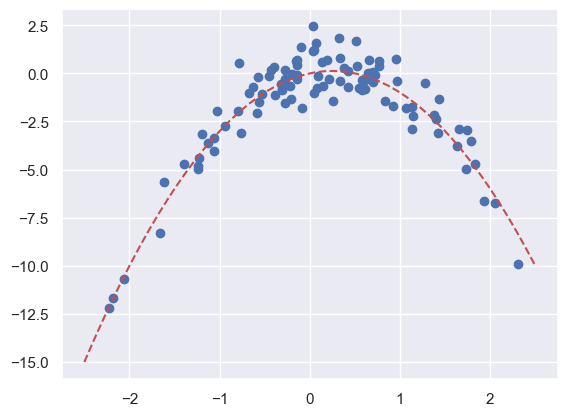

In [441]:
plt.scatter(X, y)

x_predict=np.linspace(-2.5,2.5)
y_predict=x_predict-2*x_predict**2
plt.plot(x_predict,y_predict, 'r--')

I find that there is noise especially around the vertex of the parabola for the model of the equation y, but the scatterplot is mostly parabolic

2c.

In [442]:
np.random.seed(312)
loocv_scores = pd.Series()
loo = LeaveOneOut()
loo.get_n_splits(X)
for i in range(4):
    poly_reg = Pipeline([("poly", PolynomialFeatures(degree = i+1)), ("reg", LinearRegression())])
    loo = LeaveOneOut()
    cv_scores = cross_val_score(poly_reg, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = loo)
    loocv_scores.loc[i] = abs(cv_scores.mean())
    print(poly_reg["reg"].get_params())
loocv_scores

C:\Users\Bernhard\AppData\Local\Temp\ipykernel_97048\2637963259.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  loocv_scores = pd.Series()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


0    8.015655
1    0.807797
2    0.823459
3    0.827053
dtype: float64

<p>for the linear model Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#949 we get 8.016 as the LOOCV error.<p>
<p>for the linear model Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#946<sub>2</sub>X<sup>2</sup> + &#949 we get 0.0808 as the LOOCV error.<p>
<p>for the linear model Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#946<sub>2</sub>X<sup>2</sup> +  &#946<sub>3</sub>X<sup>3</sup> + &#949 we get 0.0823 as the LOOCV error.<p>
<p>for the linear model Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#946<sub>2</sub>X<sup>2</sup> +  &#946<sub>3</sub>X<sup>3</sup> +  &#946<sub>4</sub>X<sup>4</sup> + &#949 we get 0.0827 as the LOOCV error.<p>


2d.

<p>The model Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#946<sub>2</sub>X<sup>2</sup> + &#949 had the lowest LOOCV error. This is what I expected, as the original model was formed off of the equation Y = x-2x<sup>2</sup> + &#949 which is best modeled by the second order polynomial equation that performed the best.</p>

In [443]:
for i in range(1, 5):
    poly = PolynomialFeatures(degree = i, include_bias=True)

    ortho_X = np.linalg.qr(poly.fit_transform(X.reshape(-1,1)))[0][:,1:]
    exog = sm.add_constant(ortho_X)
    endog = y
    mod = sm.OLS(endog, exog)
    res = mod.fit()
    print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6505      0.274     -6.033      0.000      -2.193      -1.108
x1             6.1251      2.736      2.239      0.027       0.696      11.554
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6505      0.089    -18.615      0.000      -1.827      -1.475
x1             6.1251      0.887      6.908      0.000       4.365       7.885
x2            25.6376      0.887     28.914      0.000      23.878      27.397
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6505      0.089    -18.538      0.000      -1.827      -1.474
x1             6.1251      0.890      6.880      0.0

<p>The significance for model the first and second degree predictors seemd to have the most statistical significance on average. In all estimates with polynomials X<sup>2</sup> or above, the p value for these predictors was very high, meaning that these values are very statistically significant. </p>
<p>The other orders of our predictor X seemed to not be statistically significant with an alpha of 0.05</p>
<p>These results agree with the conclusions drawn based on the cross validation results. These results suggest that a model such as model ii is the best fit for predicting.</p>

3.
3a.

In [444]:
df = pd.read_csv("Boston.csv")
mean_estimate = df['medv'].mean()
mean_estimate

22.532806324110677

3b.

In [445]:
sem = df['medv'].std()/(len(df)**0.5)
sem


0.40886114749753505

This standard error estimate gives a measure of the sample-to-sample variability of the sample mean. It is a measure of how well a sample represents the population. Since medv si measured in units of 1000 USD, the standard error translates to $408.

3c.

In [446]:
n = 10000
means = np.empty(n)
for i in range(n):
    sample = resample(df['medv'])
    means[i]=sample.mean()
bs_mean = means.mean()
bs_se = means.std()
print("Bootstrap mean: {}".format(bs_mean))
print("Bootstrap standard error: {}".format(bs_se))


Bootstrap mean: 22.529328873517787
Bootstrap standard error: 0.40962209178829634


<p>Using bootstrap resampling, we have an estimated 0.405 for the standard error of &#956&#770 this is very similar to the estimate we made in part 3b as well.</p>

3d.

In [447]:
conf_int = [bs_mean-(2*bs_se), bs_mean + (2*bs_se)]
print("95%% confidence interval: {}".format(conf_int))

95%% confidence interval: [21.710084689941194, 23.34857305709438]


4.
4a.

In [448]:
np.random.seed(312)
X = np.random.normal(size=100)
noise = np.random.normal(size=100)


4b.

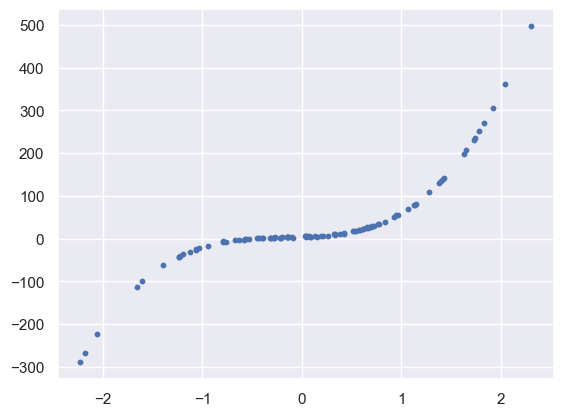

In [449]:
y = [4 + 8*i + 16*i**2 + 32*i**3 + e for i, e in zip(X, noise)]
plt.scatter(X,y, s=10)

4c.

In [450]:

lm = LinearRegression()

def best_subset_adj_r2(estimator, X, y, max_size=8, cv=5):
    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1) for k in range(min(n_features, max_size)))

    best_size_subset = []
    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = -np.inf
        best_subset = None
        for subset in subsets_k: # for each subset
            estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size

            #calculate adj r2
            score = estimator.score(X.iloc[:, list(subset)], y)
            score = 1-(1-score)*(len(X)-1)/(len(X)-len(subset)-1)
            if score > best_score:
                best_score, best_subset = score, subset
        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)
        
    # compare best subsets of each size
    best_score = -np.inf
    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        estimator.fit(X.iloc[:, list(subset)], y)

        #calcualte adj r2
        score = estimator.score(X.iloc[:, list(subset)], y)
        score = 1-(1-score)*(len(X)-1)/(len(X)-len(subset)-1)
        list_scores.append(score)
        if score > best_score:
            
            best_score, best_subset, best_coeff = score, subset, [estimator.intercept_] + list(estimator.coef_)

    return best_subset, best_score, best_size_subset, list_scores, best_coeff

powers = pd.DataFrame(X.copy(), columns=['X^1'])
for i in range(2, 11):
    powers["X^{}".format(i)] = X.copy()**i





Best model according to R^2: ['X^1' 'X^2' 'X^3' 'X^9'] with adjusted R^2 of 0.9999295106914541
Best model coefficients: [4.201671387279621, 7.794343936619579, 15.90186408722467, 32.15723071002788, -0.0014040259551926226]
Best models for R^2:
1 ['X^3'] : 0.9619261871023221
2 ['X^2' 'X^3'] : 0.9984167311462807
3 ['X^1' 'X^2' 'X^3'] : 0.9999279190721606
4 ['X^1' 'X^2' 'X^3' 'X^9'] : 0.9999295106914541
5 ['X^1' 'X^2' 'X^3' 'X^7' 'X^8'] : 0.9999293755643552
6 ['X^1' 'X^2' 'X^3' 'X^4' 'X^6' 'X^7'] : 0.999928669734914
7 ['X^1' 'X^2' 'X^3' 'X^5' 'X^7' 'X^8' 'X^9'] : 0.999928439384746
8 ['X^1' 'X^2' 'X^3' 'X^4' 'X^5' 'X^6' 'X^7' 'X^9'] : 0.9999277357443391
9 ['X^1' 'X^2' 'X^3' 'X^5' 'X^6' 'X^7' 'X^8' 'X^9' 'X^10'] : 0.9999271411980909
10 ['X^1' 'X^2' 'X^3' 'X^4' 'X^5' 'X^6' 'X^7' 'X^8' 'X^9' 'X^10'] : 0.9999264575945199


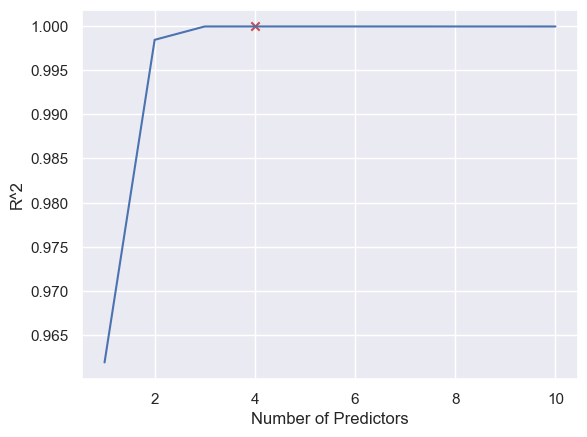

In [451]:
best_sub, best_score, best_size, list_scores, best_coeff = best_subset_adj_r2(lm, powers, y, max_size=10, cv=5)
print("Best model according to R^2:",powers.columns[list(best_sub)].values, "with adjusted R^2 of", best_score)
print("Best model coefficients: {}".format(best_coeff))
print("Best models for R^2:")
for subset, score in zip(best_size, list_scores):
    print(len(subset), powers.columns[list(subset)].values, ":", score)

plt.plot(range(1,11), list_scores)
plt.xlabel("Number of Predictors")
plt.ylabel("R^2")
xmax = list(range(1,11))[np.argmax(list_scores)]
ymax = max(list_scores)
plt.scatter(xmax, ymax, marker="x", c="r")

In [452]:
def best_subset_BIC(estimator, X, y, max_size=8, cv=5):
    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1) for k in range(min(n_features, max_size)))

    best_size_subset = []
    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = np.inf
        best_subset = None
        for subset in subsets_k: # for each subset
            estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size

            #calculate BIC
            ypred = estimator.predict(X.iloc[:, list(subset)])

            rss = sum(np.square(ypred-y))
            
            score = (len(X)*np.log(rss/len(X))) * len(subset)*np.log(len(X))
            if score < best_score:
                best_score, best_subset = score, subset
        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)
        
    # compare best subsets of each size
    best_score = np.inf
    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        estimator.fit(X.iloc[:, list(subset)], y)

        #calcualte adj r2
        ypred = estimator.predict(X.iloc[:, list(subset)])

        rss = sum(np.square(ypred-y))
        score = len(X)*np.log(rss/len(X))+len(subset)*np.log(len(X))
        list_scores.append(score)
        if score < best_score:
            best_score, best_subset, best_coeff = score, subset, [estimator.intercept_] + list(estimator.coef_)

    return best_subset, best_score, best_size_subset, list_scores, best_coeff



Best model according to BIC: ['X^1' 'X^2' 'X^3'] with BIC of -13.49717469121203
Best model coefficients: [4.194455981736574, 8.040370957238895, 15.921863296389489, 31.973392655659282]
Best models for BIC:
1 ['X^3'] : 606.3036650275886
2 ['X^2' 'X^3'] : 291.87967362551007
3 ['X^1' 'X^2' 'X^3'] : -13.49717469121203
4 ['X^1' 'X^2' 'X^3' 'X^9'] : -12.17197840052556
5 ['X^1' 'X^2' 'X^3' 'X^7' 'X^8'] : -8.433503940012073
6 ['X^1' 'X^2' 'X^3' 'X^4' 'X^6' 'X^7'] : -3.9034112605926907
7 ['X^1' 'X^2' 'X^3' 'X^5' 'X^7' 'X^8' 'X^9'] : -0.056918312409905525
8 ['X^1' 'X^2' 'X^3' 'X^4' 'X^5' 'X^6' 'X^7' 'X^9'] : 4.433820957808322
9 ['X^1' 'X^2' 'X^3' 'X^5' 'X^6' 'X^7' 'X^8' 'X^9' 'X^10'] : 8.753380524240853
10 ['X^1' 'X^2' 'X^3' 'X^4' 'X^5' 'X^6' 'X^7' 'X^8' 'X^9' 'X^10'] : 13.175104395554271


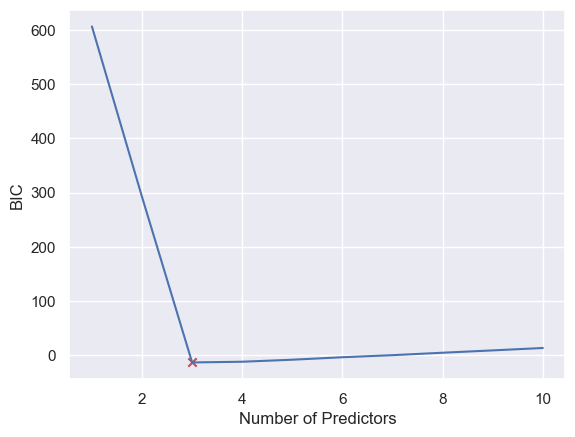

In [453]:
best_sub, best_score, best_size, list_scores, best_coeff = best_subset_BIC(lm, powers, y, max_size=10, cv=5)
print("Best model according to BIC:",powers.columns[list(best_sub)].values, "with BIC of", best_score)
print("Best model coefficients: {}".format(best_coeff))
print("Best models for BIC:")
for subset, score in zip(best_size, list_scores):
    print(len(subset), powers.columns[list(subset)].values, ":", score)

plt.plot(range(1,11), list_scores)
plt.xlabel("Number of Predictors")
plt.ylabel("BIC")
xmax = list(range(1,11))[np.argmin(list_scores)]
ymax = min(list_scores)

plt.scatter(xmax, ymax, marker="x", c="r")

In [454]:
def best_subset_Cp(estimator, X, y, max_size=8, cv=5):
    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1) for k in range(min(n_features, max_size)))

    best_size_subset = []
    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = np.inf
        best_subset = None
        for subset in subsets_k: # for each subset
            estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size

            #calculate BIC
            ypred = estimator.predict(X.iloc[:, list(subset)])

            rss = sum(np.square(ypred-y))
            mse = mean_squared_error(y, ypred)
            score = 1/len(X) * (rss+(2*len(subset)*mse))
            if score < best_score:
                best_score, best_subset = score, subset
        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)
        
    # compare best subsets of each size
    best_score = np.inf
    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        estimator.fit(X.iloc[:, list(subset)], y)

        #calcualte adj r2
        ypred = estimator.predict(X.iloc[:, list(subset)])

        rss = sum(np.square(ypred-y))
        mse = mean_squared_error(y, ypred)
        score = 1/len(X) * (rss+(2*len(subset)*mse))
        list_scores.append(score)
        if score < best_score:
            best_score, best_subset, best_coeff = score, subset, [estimator.intercept_] + list(estimator.coef_)

    return best_subset, best_score, best_size_subset, list_scores, best_coeff



Best model according to Cp: ['X^1' 'X^2' 'X^3' 'X^9'] with BIC of 0.7953559327995403
Best model coefficients: [4.201671387279621, 7.794343936619579, 15.90186408722467, 32.15723071002788, -0.0014040259551926226]
Best models for Cp:
1 ['X^3'] : 418.546324563729
2 ['X^2' 'X^3'] : 17.565101174178995
3 ['X^1' 'X^2' 'X^3'] : 0.806656022069826
4 ['X^1' 'X^2' 'X^3' 'X^9'] : 0.7953559327995403
5 ['X^1' 'X^2' 'X^3' 'X^7' 'X^8'] : 0.8030941140153525
6 ['X^1' 'X^2' 'X^3' 'X^4' 'X^6' 'X^7'] : 0.8170821499372675
7 ['X^1' 'X^2' 'X^3' 'X^5' 'X^7' 'X^8' 'X^9'] : 0.8253870643721402
8 ['X^1' 'X^2' 'X^3' 'X^4' 'X^5' 'X^6' 'X^7' 'X^9'] : 0.8389070207391819
9 ['X^1' 'X^2' 'X^3' 'X^5' 'X^6' 'X^7' 'X^8' 'X^9' 'X^10'] : 0.8509370941838437
10 ['X^1' 'X^2' 'X^3' 'X^4' 'X^5' 'X^6' 'X^7' 'X^8' 'X^9' 'X^10'] : 0.8637737414027814


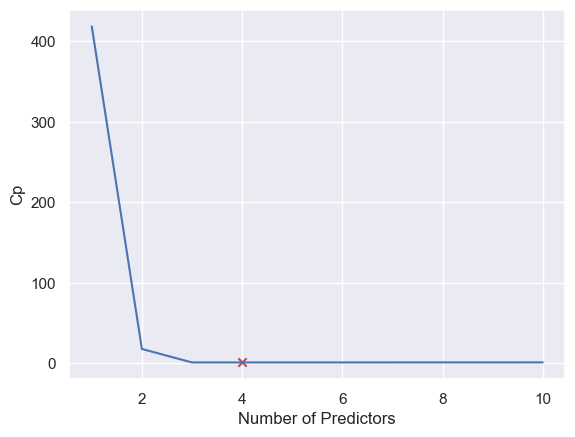

In [455]:
best_sub, best_score, best_size, list_scores, best_coeff = best_subset_Cp(lm, powers, y, max_size=10, cv=5)
print("Best model according to Cp:",powers.columns[list(best_sub)].values, "with BIC of", best_score)
print("Best model coefficients: {}".format(best_coeff))
print("Best models for Cp:")
for subset, score in zip(best_size, list_scores):
    print(len(subset), powers.columns[list(subset)].values, ":", score)

plt.plot(range(1,11), list_scores)
plt.xlabel("Number of Predictors")
plt.ylabel("Cp")
xmax = list(range(1,11))[np.argmin(list_scores)]
ymax = min(list_scores)
plt.scatter(xmax, ymax, marker="x", c="r")

<p>The best model according to BIC is with Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#946<sub>2</sub>X<sup>2</sup> +  &#946<sub>3</sub>X<sup>3</sup> + &#949</p>
<p>The best model according to R<sup>2</sup> and C<sub>p</sub> is Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#946<sub>2</sub>X<sup>2</sup> +  &#946<sub>3</sub>X<sup>3</sup> +  &#946<sub>4</sub>X<sup>4</sup> + &#949</p>

4c.

BIC Forwards:

c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Best model according to forwards stepwise BIC: ('X^1', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9', 'X^10')
Best fit coefficients: [4.1609911021504296, 8.049862941504776, 16.27075977567907, 31.31075290009626, -0.8226925280843381, 0.6912462035329752, 0.61946707179958, -0.20432925571432037, -0.16922328292726485, 0.01797863011542944, 0.01487234221415945]


c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)",[-492.4074406632106],-492.407441,"(X^3,)",NaN,0.0,NaN
2,"(1, 2)",[-20.267424431744995],-20.267424,"(X^2, X^3)",NaN,0.0,NaN
3,"(0, 1, 2)",[-0.9131954966828219],-0.913195,"(X^1, X^2, X^3)",NaN,0.0,NaN
4,"(0, 1, 2, 8)",[-0.8837288142217113],-0.883729,"(X^1, X^2, X^3, X^9)",NaN,0.0,NaN
5,"(0, 1, 2, 7, 8)",[-0.8770448233110522],-0.877045,"(X^1, X^2, X^3, X^8, X^9)",NaN,0.0,NaN
6,"(0, 1, 2, 6, 7, 8)",[-0.8756045531795711],-0.875605,"(X^1, X^2, X^3, X^7, X^8, X^9)",NaN,0.0,NaN
7,"(0, 1, 2, 4, 6, 7, 8)",[-0.8688284888127791],-0.868828,"(X^1, X^2, X^3, X^5, X^7, X^8, X^9)",NaN,0.0,NaN
8,"(0, 1, 2, 3, 4, 6, 7, 8)",[-0.8682328831732236],-0.868233,"(X^1, X^2, X^3, X^4, X^5, X^7, X^8, X^9)",NaN,0.0,NaN
9,"(0, 1, 2, 3, 4, 6, 7, 8, 9)",[-0.8663613055970726],-0.866361,"(X^1, X^2, X^3, X^4, X^5, X^7, X^8, X^9, X^10)",NaN,0.0,NaN
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[-0.8637737414027814],-0.863774,"(X^1, X^2, X^3, X^4, X^5, X^6, X^7, X^8, X^9, ...",NaN,0.0,NaN


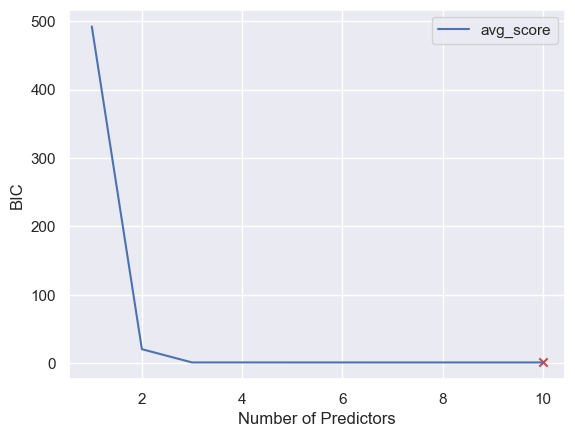

In [456]:
def BIC_scorer(estimator, X, y):
    estimator.fit(X,y)
    ypred = estimator.predict(X)
    rss = sum(np.square(ypred-y))
    mse = mean_squared_error(y, ypred)
    score = 1/len(X) * (rss+(2*len(subset)*mse))

    #negate our BIC calcualation to conform to sklearn scorer signature (greater is better)
    return -score

X=powers    
sfs1 = SFS(lm, k_features=10, forward=True, floating=False, scoring=BIC_scorer, cv=0)
sfs1=sfs1.fit(X,y)
d = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

lm.fit(X.iloc[:, list(d.iloc[np.argmax(d["avg_score"]),0])], y)
print("Best model according to forwards stepwise BIC:", d.iloc[np.argmax(d["avg_score"]),3])
print("Best fit coefficients:",[lm.intercept_] + list(lm.coef_))


d['avg_score'] = d['avg_score']*-1 #un-negate BIC calculation 
d.plot(y='avg_score')
plt.xlabel("Number of Predictors")
plt.ylabel("BIC")
xmax = list(range(1,11))[np.argmin(d["avg_score"])]
ymax = min(d["avg_score"])

plt.scatter(xmax, ymax, marker="x", c="r")
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T



BIC Backwards:

Best model according to forwards stepwise BIC: ('X^1', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9', 'X^10')
Best fit coefficients: [4.1609911021504296, 8.049862941504776, 16.27075977567907, 31.31075290009626, -0.8226925280843381, 0.6912462035329752, 0.61946707179958, -0.20432925571432037, -0.16922328292726485, 0.01797863011542944, 0.01487234221415945]


c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[-0.8637737414027814],-0.863774,"(X^1, X^2, X^3, X^4, X^5, X^6, X^7, X^8, X^9, ...",NaN,0.0,NaN
9,"(0, 1, 2, 4, 5, 6, 7, 8, 9)",[-0.8653597567971291],-0.86536,"(X^1, X^2, X^3, X^5, X^6, X^7, X^8, X^9, X^10)",NaN,0.0,NaN
8,"(0, 1, 2, 4, 5, 6, 7, 8)",[-0.868499298141012],-0.868499,"(X^1, X^2, X^3, X^5, X^6, X^7, X^8, X^9)",NaN,0.0,NaN
7,"(0, 1, 2, 4, 6, 7, 8)",[-0.8688284888127791],-0.868828,"(X^1, X^2, X^3, X^5, X^7, X^8, X^9)",NaN,0.0,NaN
6,"(0, 1, 2, 6, 7, 8)",[-0.8756045531795711],-0.875605,"(X^1, X^2, X^3, X^7, X^8, X^9)",NaN,0.0,NaN
5,"(0, 1, 2, 6, 7)",[-0.8761026698349299],-0.876103,"(X^1, X^2, X^3, X^7, X^8)",NaN,0.0,NaN
4,"(0, 1, 2, 6)",[-0.8837567113920858],-0.883757,"(X^1, X^2, X^3, X^7)",NaN,0.0,NaN
3,"(0, 1, 2)",[-0.9131954966828219],-0.913195,"(X^1, X^2, X^3)",NaN,0.0,NaN
2,"(1, 2)",[-20.267424431744995],-20.267424,"(X^2, X^3)",NaN,0.0,NaN
1,"(2,)",[-492.4074406632106],-492.407441,"(X^3,)",NaN,0.0,NaN


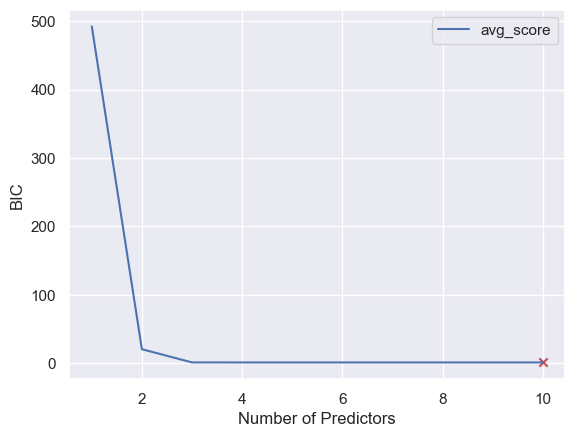

In [457]:
sfs1 = SFS(lm, k_features=1, forward=False, floating=False, scoring=BIC_scorer, cv=0)
sfs1=sfs1.fit(X,y)
d = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

lm.fit(X.iloc[:, list(d.iloc[np.argmax(d["avg_score"]),0])], y)
print("Best model according to forwards stepwise BIC:", d.iloc[np.argmax(d["avg_score"]),3])
print("Best fit coefficients:",[lm.intercept_] + list(lm.coef_))


d['avg_score'] = d['avg_score']*-1 #un-negate BIC calculation 
d.plot(y='avg_score')
plt.xlabel("Number of Predictors")
plt.ylabel("BIC")
xmax = 11 - list(range(1,11))[np.argmin(d["avg_score"])]
ymax = min(d["avg_score"])

plt.scatter(xmax, ymax, marker="x", c="r")
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T



R^2 Forwards

Best model according to forwards stepwise R^2: ('X^1', 'X^2', 'X^3', 'X^9')
Best fit coefficients: [4.201671387279621, 7.794343936619579, 15.90186408722467, 32.15723071002788, -0.0014040259551926226]


c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)",[0.9619261871023221],0.961926,"(X^3,)",NaN,0.0,NaN
2,"(1, 2)",[0.9984167311462807],0.998417,"(X^2, X^3)",NaN,0.0,NaN
3,"(0, 1, 2)",[0.9999279190721606],0.999928,"(X^1, X^2, X^3)",NaN,0.0,NaN
4,"(0, 1, 2, 8)",[0.9999295106914541],0.99993,"(X^1, X^2, X^3, X^9)",NaN,0.0,NaN
5,"(0, 1, 2, 7, 8)",[0.9999292996154285],0.999929,"(X^1, X^2, X^3, X^8, X^9)",NaN,0.0,NaN
6,"(0, 1, 2, 6, 7, 8)",[0.9999286567477939],0.999929,"(X^1, X^2, X^3, X^7, X^8, X^9)",NaN,0.0,NaN
7,"(0, 1, 2, 4, 6, 7, 8)",[0.999928439384746],0.999928,"(X^1, X^2, X^3, X^5, X^7, X^8, X^9)",NaN,0.0,NaN
8,"(0, 1, 2, 3, 4, 6, 7, 8)",[0.9999277026001985],0.999928,"(X^1, X^2, X^3, X^4, X^5, X^7, X^8, X^9)",NaN,0.0,NaN
9,"(0, 1, 2, 3, 4, 6, 7, 8, 9)",[0.9999270568728781],0.999927,"(X^1, X^2, X^3, X^4, X^5, X^7, X^8, X^9, X^10)",NaN,0.0,NaN
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.9999264575945199],0.999926,"(X^1, X^2, X^3, X^4, X^5, X^6, X^7, X^8, X^9, ...",NaN,0.0,NaN


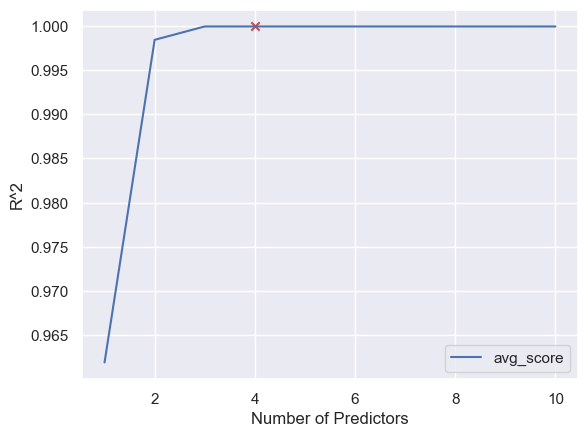

In [458]:
def R2_scorer(estimator, X, y):
    score = estimator.score(X, y)
    score = 1-(1-score)*(len(X)-1)/(len(X)-X.shape[1]-1)

    #negate our BIC calcualation to conform to sklearn scorer signature (greater is better)
    return score
  
sfs1 = SFS(lm, k_features=10, forward=True, floating=False, scoring=R2_scorer, cv=0)
sfs1=sfs1.fit(X,y)
d = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T


lm.fit(X.iloc[:, list(d.iloc[np.argmax(d["avg_score"]),0])], y)
print("Best model according to forwards stepwise R^2:", d.iloc[np.argmax(d["avg_score"]),3])
print("Best fit coefficients:",[lm.intercept_] + list(lm.coef_))


d.plot(y='avg_score')
plt.xlabel("Number of Predictors")
plt.ylabel("R^2")
xmax = list(range(1,11))[np.argmax(d["avg_score"])]
ymax = max(d["avg_score"])

plt.scatter(xmax, ymax, marker="x", c="r")
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

R^2 Backwards

Best model according to forwards stepwise R^2: ('X^1', 'X^2', 'X^3', 'X^7')
Best fit coefficients: [4.203726716457783, 7.74973709386607, 15.899137537634099, 32.215515265845305, -0.008990742392430917]


c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.9999264575945199],0.999926,"(X^1, X^2, X^3, X^4, X^5, X^6, X^7, X^8, X^9, ...",NaN,0.0,NaN
9,"(0, 1, 2, 4, 5, 6, 7, 8, 9)",[0.9999271411980909],0.999927,"(X^1, X^2, X^3, X^5, X^6, X^7, X^8, X^9, X^10)",NaN,0.0,NaN
8,"(0, 1, 2, 4, 5, 6, 7, 8)",[0.9999276804159322],0.999928,"(X^1, X^2, X^3, X^5, X^6, X^7, X^8, X^9)",NaN,0.0,NaN
7,"(0, 1, 2, 4, 6, 7, 8)",[0.999928439384746],0.999928,"(X^1, X^2, X^3, X^5, X^7, X^8, X^9)",NaN,0.0,NaN
6,"(0, 1, 2, 6, 7, 8)",[0.9999286567477939],0.999929,"(X^1, X^2, X^3, X^7, X^8, X^9)",NaN,0.0,NaN
5,"(0, 1, 2, 6, 7)",[0.9999293755643552],0.999929,"(X^1, X^2, X^3, X^7, X^8)",NaN,0.0,NaN
4,"(0, 1, 2, 6)",[0.9999295084662779],0.99993,"(X^1, X^2, X^3, X^7)",NaN,0.0,NaN
3,"(0, 1, 2)",[0.9999279190721606],0.999928,"(X^1, X^2, X^3)",NaN,0.0,NaN
2,"(1, 2)",[0.9984167311462807],0.998417,"(X^2, X^3)",NaN,0.0,NaN
1,"(2,)",[0.9619261871023221],0.961926,"(X^3,)",NaN,0.0,NaN


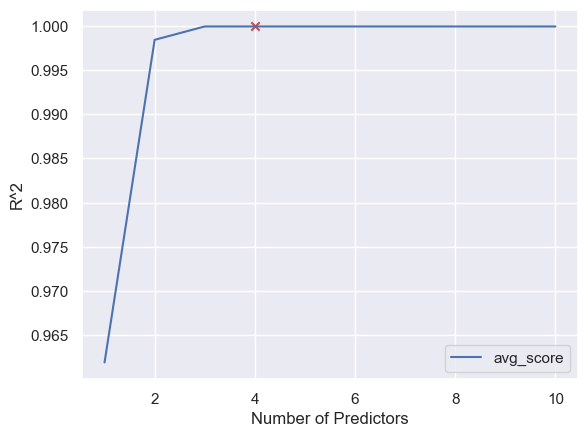

In [459]:
sfs1 = SFS(lm, k_features=1, forward=False, floating=False, scoring=R2_scorer, cv=0)
sfs1=sfs1.fit(X,y)
d = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T


lm.fit(X.iloc[:, list(d.iloc[np.argmax(d["avg_score"]),0])], y)
print("Best model according to forwards stepwise R^2:", d.iloc[np.argmax(d["avg_score"]),3])
print("Best fit coefficients:",[lm.intercept_] + list(lm.coef_))


d.plot(y='avg_score')
plt.xlabel("Number of Predictors")
plt.ylabel("R^2")
xmax = 11 - list(range(1,11))[np.argmax(d["avg_score"])]
ymax = max(d["avg_score"])

plt.scatter(xmax, ymax, marker="x", c="r")
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

Cp Forwards

Best model according to forwards stepwise Cp: ('X^1', 'X^2', 'X^3', 'X^9')
Best fit coefficients: [4.201671387279621, 7.794343936619579, 15.90186408722467, 32.15723071002788, -0.0014040259551926226]


c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)",[-418.546324563729],-418.546325,"(X^3,)",NaN,0.0,NaN
2,"(1, 2)",[-17.565101174178995],-17.565101,"(X^2, X^3)",NaN,0.0,NaN
3,"(0, 1, 2)",[-0.806656022069826],-0.806656,"(X^1, X^2, X^3)",NaN,0.0,NaN
4,"(0, 1, 2, 8)",[-0.7953559327995403],-0.795356,"(X^1, X^2, X^3, X^9)",NaN,0.0,NaN
5,"(0, 1, 2, 7, 8)",[-0.8039577547017979],-0.803958,"(X^1, X^2, X^3, X^8, X^9)",NaN,0.0,NaN
6,"(0, 1, 2, 6, 7, 8)",[-0.8172309163009331],-0.817231,"(X^1, X^2, X^3, X^7, X^8, X^9)",NaN,0.0,NaN
7,"(0, 1, 2, 4, 6, 7, 8)",[-0.8253870643721402],-0.825387,"(X^1, X^2, X^3, X^5, X^7, X^8, X^9)",NaN,0.0,NaN
8,"(0, 1, 2, 3, 4, 6, 7, 8)",[-0.8392917870674493],-0.839292,"(X^1, X^2, X^3, X^4, X^5, X^7, X^8, X^9)",NaN,0.0,NaN
9,"(0, 1, 2, 3, 4, 6, 7, 8, 9)",[-0.851921950503788],-0.851922,"(X^1, X^2, X^3, X^4, X^5, X^7, X^8, X^9, X^10)",NaN,0.0,NaN
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[-0.8637737414027814],-0.863774,"(X^1, X^2, X^3, X^4, X^5, X^6, X^7, X^8, X^9, ...",NaN,0.0,NaN


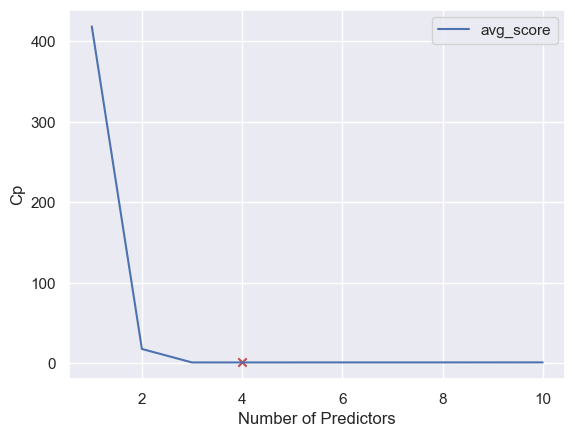

In [460]:
def Cp_scorer(estimator, X, y):
    score = estimator.score(X, y)
    ypred = estimator.predict(X)

    rss = sum(np.square(ypred-y))
    mse = mean_squared_error(y, ypred)
    score = 1/len(X) * (rss+(2*X.shape[1]*mse))

    #negate our BIC calcualation to conform to sklearn scorer signature (greater is better)
    return -score

sfs1 = SFS(lm, k_features=10, forward=True, floating=False, scoring=Cp_scorer, cv=0)
sfs1=sfs1.fit(X,y)
d = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T


lm.fit(X.iloc[:, list(d.iloc[np.argmax(d["avg_score"]),0])], y)
print("Best model according to forwards stepwise Cp:", d.iloc[np.argmax(d["avg_score"]),3])
print("Best fit coefficients:",[lm.intercept_] + list(lm.coef_))

d['avg_score'] = d['avg_score']*-1 #un-negate Cp calculation
d.plot(y='avg_score')
plt.xlabel("Number of Predictors")
plt.ylabel("Cp")
xmax = list(range(1,11))[np.argmin(d["avg_score"])]
ymax = min(d["avg_score"])

plt.scatter(xmax, ymax, marker="x", c="r")
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

Cp Backwards

Best model according to forwards stepwise Cp: ('X^1', 'X^2', 'X^3', 'X^7')
Best fit coefficients: [4.203726716457783, 7.74973709386607, 15.899137537634099, 32.215515265845305, -0.008990742392430917]


c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[-0.8637737414027814],-0.863774,"(X^1, X^2, X^3, X^4, X^5, X^6, X^7, X^8, X^9, ...",NaN,0.0,NaN
9,"(0, 1, 2, 4, 5, 6, 7, 8, 9)",[-0.8509370941838437],-0.850937,"(X^1, X^2, X^3, X^5, X^6, X^7, X^8, X^9, X^10)",NaN,0.0,NaN
8,"(0, 1, 2, 4, 5, 6, 7, 8)",[-0.8395493215363115],-0.839549,"(X^1, X^2, X^3, X^5, X^6, X^7, X^8, X^9)",NaN,0.0,NaN
7,"(0, 1, 2, 4, 6, 7, 8)",[-0.8253870643721402],-0.825387,"(X^1, X^2, X^3, X^5, X^7, X^8, X^9)",NaN,0.0,NaN
6,"(0, 1, 2, 6, 7, 8)",[-0.8172309163009331],-0.817231,"(X^1, X^2, X^3, X^7, X^8, X^9)",NaN,0.0,NaN
5,"(0, 1, 2, 6, 7)",[-0.8030941140153525],-0.803094,"(X^1, X^2, X^3, X^7, X^8)",NaN,0.0,NaN
4,"(0, 1, 2, 6)",[-0.7953810402528773],-0.795381,"(X^1, X^2, X^3, X^7)",NaN,0.0,NaN
3,"(0, 1, 2)",[-0.806656022069826],-0.806656,"(X^1, X^2, X^3)",NaN,0.0,NaN
2,"(1, 2)",[-17.565101174178995],-17.565101,"(X^2, X^3)",NaN,0.0,NaN
1,"(2,)",[-418.546324563729],-418.546325,"(X^3,)",NaN,0.0,NaN


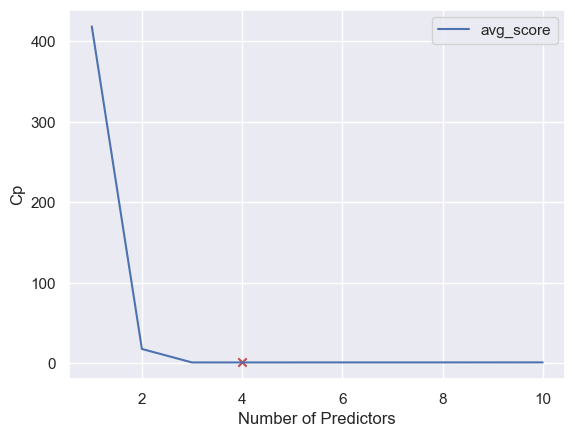

In [461]:
sfs1 = SFS(lm, k_features=1, forward=False, floating=False, scoring=Cp_scorer, cv=0)
sfs1=sfs1.fit(X,y)
d = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T


lm.fit(X.iloc[:, list(d.iloc[np.argmax(d["avg_score"]),0])], y)
print("Best model according to forwards stepwise Cp:", d.iloc[np.argmax(d["avg_score"]),3])
print("Best fit coefficients:",[lm.intercept_] + list(lm.coef_))

d['avg_score'] = d['avg_score']*-1 #un-negate Cp calculation
d.plot(y='avg_score')
plt.xlabel("Number of Predictors")
plt.ylabel("Cp")
xmax = 11-list(range(1,11))[np.argmin(d["avg_score"])]
ymax = min(d["avg_score"])

plt.scatter(xmax, ymax, marker="x", c="r")
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

The results in part d are mostly the same as the results in part c. The only difference is that for our BIC calculations, the forwards stepwise selection and the backwards stepwise selection picked a model using all 10 powers of x (all 10 predictors) as the best fit.

4e.